In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
companies = ["Waterstones", "Independent"]
companies


['Waterstones', 'Independent']

In [3]:
cities = [
    "London",
    "Manchester",
    "Birmingham",
    "Liverpool",
    "Leeds",
    "Bristol",
    "Oxford",
    "Cambridge"
]

cities


['London',
 'Manchester',
 'Birmingham',
 'Liverpool',
 'Leeds',
 'Bristol',
 'Oxford',
 'Cambridge']

In [4]:
age_groups = [
    "18-25",
    "26-35",
    "36-45",
    "46-55",
    "56-65",
    "65+"
]

customer_types = [
    "Student",
    "Professional",
    "Academic",
    "SciFi Enthusiast",
    "Collector"
]


In [5]:
price_range = {
    "Waterstones": (8, 14),
    "Independent": (10, 18)
}

profit_margin = {
    "Waterstones": 0.35,
    "Independent": 0.45
}


In [6]:
weekly_sales_range = {
    "Waterstones": (80, 300),
    "Independent": (20, 120)
}


In [7]:
np.random.seed(42)

data = []

for city in cities:
    for company in companies:
        for age in age_groups:
            for customer in customer_types:

                weekly_sales = np.random.randint(
                    weekly_sales_range[company][0],
                    weekly_sales_range[company][1]
                )

                price = np.random.uniform(
                    price_range[company][0],
                    price_range[company][1]
                )

                weekly_revenue = weekly_sales * price

                weekly_profit = weekly_revenue * profit_margin[company]

                yearly_profit = weekly_profit * 52

                data.append({
                    "City": city,
                    "Company": company,
                    "Age Group": age,
                    "Customer Type": customer,
                    "Weekly Sales": weekly_sales,
                    "Price (£)": round(price,2),
                    "Weekly Revenue (£)": round(weekly_revenue,2),
                    "Weekly Profit (£)": round(weekly_profit,2),
                    "Yearly Profit (£)": round(yearly_profit,2)
                })

df = pd.DataFrame(data)

df.head()


,City,Company,Age Group,Customer Type,Weekly Sales,Price (£),Weekly Revenue (£),Weekly Profit (£),Yearly Profit (£)
0,London,Waterstones,18-25,Student,182,12.78,2325.82,814.04,42330.01
1,London,Waterstones,18-25,Professional,94,12.39,1164.84,407.70,21200.17
2,London,Waterstones,18-25,Academic,268,11.58,3103.74,1086.31,56487.98
3,London,Waterstones,18-25,SciFi Enthusiast,201,8.94,1796.13,628.65,32689.55
4,London,Waterstones,18-25,Collector,154,10.76,1656.35,579.72,30145.50


In [8]:
df


,City,Company,Age Group,Customer Type,Weekly Sales,Price (£),Weekly Revenue (£),Weekly Profit (£),Yearly Profit (£)
0,London,Waterstones,18-25,Student,182,12.78,2325.82,814.04,42330.01
1,London,Waterstones,18-25,Professional,94,12.39,1164.84,407.70,21200.17
2,London,Waterstones,18-25,Academic,268,11.58,3103.74,1086.31,56487.98
3,London,Waterstones,18-25,SciFi Enthusiast,201,8.94,1796.13,628.65,32689.55
4,London,Waterstones,18-25,Collector,154,10.76,1656.35,579.72,30145.50
...,...,...,...,...,...,...,...,...,...
475,Cambridge,Independent,65+,Student,57,14.29,814.64,366.59,19062.47
476,Cambridge,Independent,65+,Professional,66,16.77,1106.93,498.12,25902.09
477,Cambridge,Independent,65+,Academic,107,14.83,1586.99,714.14,37135.52
478,Cambridge,Independent,65+,SciFi Enthusiast,34,16.38,556.86,250.59,13030.63


In [9]:
df.groupby("Company")[["Weekly Profit (£)", "Yearly Profit (£)"]].sum()


,Weekly Profit (£),Yearly Profit (£)
Company,,
Independent,99596.85,5179035.27
Waterstones,172523.32,8971204.98


In [10]:
df.groupby(["City", "Company"])["Yearly Profit (£)"].sum()


City        Company    
Birmingham  Independent     660996.75
            Waterstones    1117315.85
Bristol     Independent     769006.60
            Waterstones    1197100.93
Cambridge   Independent     564895.10
            Waterstones    1093798.98
Leeds       Independent     642433.77
            Waterstones    1094817.01
Liverpool   Independent     659329.80
            Waterstones    1171147.29
London      Independent     683160.99
            Waterstones    1131920.62
Manchester  Independent     594747.48
            Waterstones    1173249.83
Oxford      Independent     604464.78
            Waterstones     991854.47
Name: Yearly Profit (£), dtype: float64

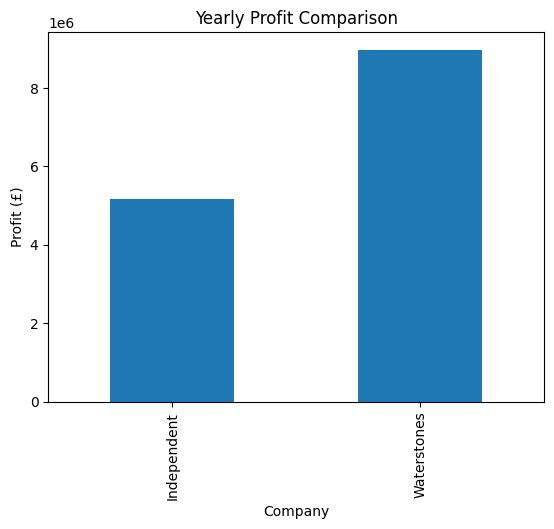

In [11]:
df.groupby("Company")["Yearly Profit (£)"].sum().plot(kind="bar")

plt.title("Yearly Profit Comparison")
plt.ylabel("Profit (£)")
plt.show()


In [12]:
df.to_csv("philip_k_dick_bookstore_dataset.csv", index=False)
